In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

/Users/samstone/venvs/pdsh/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [8]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
X = vec.fit_transform(data)

pd.DataFrame(X, columns=vec.get_feature_names())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [12]:
data = pd.read_csv('wn_flat.csv')
bios = data['biography']

In [16]:
bios = bios.dropna()
sample = bios[:5]
sample

0      I am hard working, motivated and punctual.  Ev...
4                            I like to eat strawberries.
33     Mother of a darling 2 year old and native San ...
70     I like work earn my money and learn new trades...
108    I'm currently a student at UC Berkeley majorin...
Name: biography, dtype: object

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,200,addition,administration,all,am,and,at,be,become,berkeley,...,verbal,way,will,with,wonolo,work,working,written,year,you
0,0.215824,0.000000,0.000000,0.000000,0.215824,0.243183,0.000000,0.000000,0.215824,0.000000,...,0.000000,0.000000,0.000000,0.174125,0.000000,0.000000,0.174125,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.202166,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.358842,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.187581,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.332954,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.125504,0.125504,0.125504,0.000000,0.141414,0.251008,0.125504,0.000000,0.125504,...,0.125504,0.125504,0.125504,0.101256,0.125504,0.000000,0.101256,0.125504,0.000000,0.125504


In [85]:
from numpy import random
x = np.linspace(0, 100, 30)
x = x[:, np.newaxis]
err = random.normal(0.0, 10, (30,1))
y = (x - 6.5) ** 2.0 + 1.5 + err 

0.914668025487
0.940436552387
0.999986186216


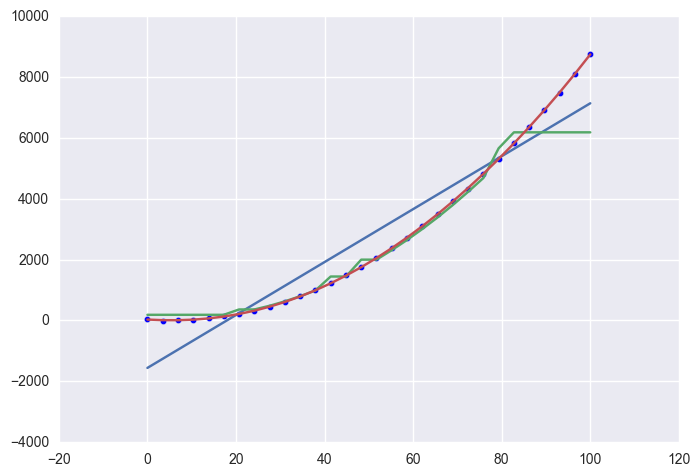

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PolynomialFeatures

lin_model = LinearRegression()
lin_model.fit(x, y)
lin_fit = lin_model.predict(x)
print lin_model.score(x, y)

knn_model = KNeighborsRegressor(n_neighbors=10, weights='uniform')
knn_model.fit(x, y)
knn_fit = knn_model.predict(x)
print knn_model.score(x, y)

poly = PolynomialFeatures(degree=5)
x2 = poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x2, y)
poly_fit = poly_model.predict(x2)
print poly_model.score(x2, y)

p = plt.scatter(x, y)
# plt.xlim(-1, 11)
# plt.ylim(-1, 50)

plt.plot(x, lin_fit)
plt.plot(x, knn_fit);
plt.plot(x, poly_fit);